In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [4]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [5]:
def get_missing_val(df):
    for cols in df.columns:
        print(cols, ' : ', df[cols].isna().sum())

In [6]:
def get_unique_vals(df):
    print('Printing unique values')
    for cols in df.columns:
        print(cols, ':', df[cols].nunique())

In [7]:
get_unique_vals(df)

Printing unique values
id : 188533
brand : 57
model : 1897
model_year : 34
milage : 6651
fuel_type : 7
engine : 1117
transmission : 52
ext_col : 319
int_col : 156
accident : 2
clean_title : 1
price : 1569


In [8]:
get_missing_val(df)

id  :  0
brand  :  0
model  :  0
model_year  :  0
milage  :  0
fuel_type  :  5083
engine  :  0
transmission  :  0
ext_col  :  0
int_col  :  0
accident  :  2452
clean_title  :  21419
price  :  0


#### EDA

188212


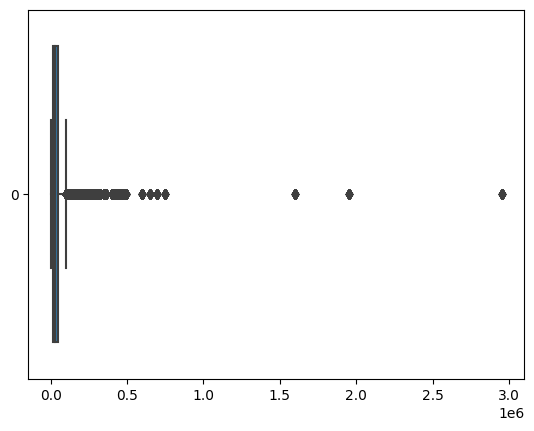

In [9]:
#Distribution of Target Variable
filtered_df = df[df['price'] < 400000]
filtered_df = df[df['milage'] < 250000]

print(filtered_df.shape[0])
# Create the boxplot
sns.boxplot(data=filtered_df['price'], orient='h')

#Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


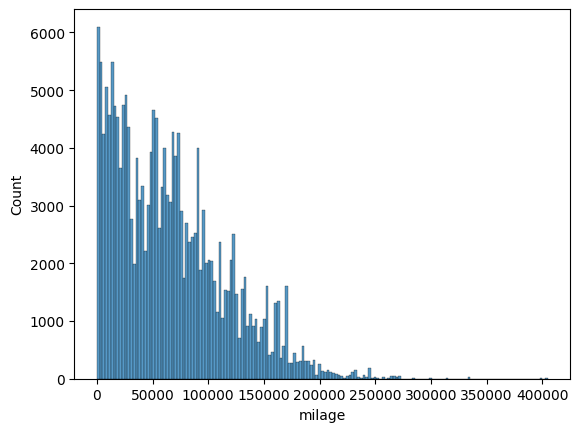

In [10]:
sns.histplot(df, x = 'milage')
plt.show()

<Axes: xlabel='price', ylabel='milage'>

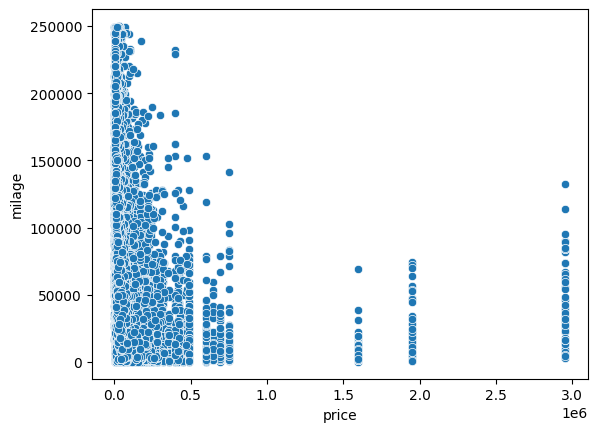

In [11]:
#milage vs price
sns.scatterplot(data = filtered_df, x = 'price', y = 'milage')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

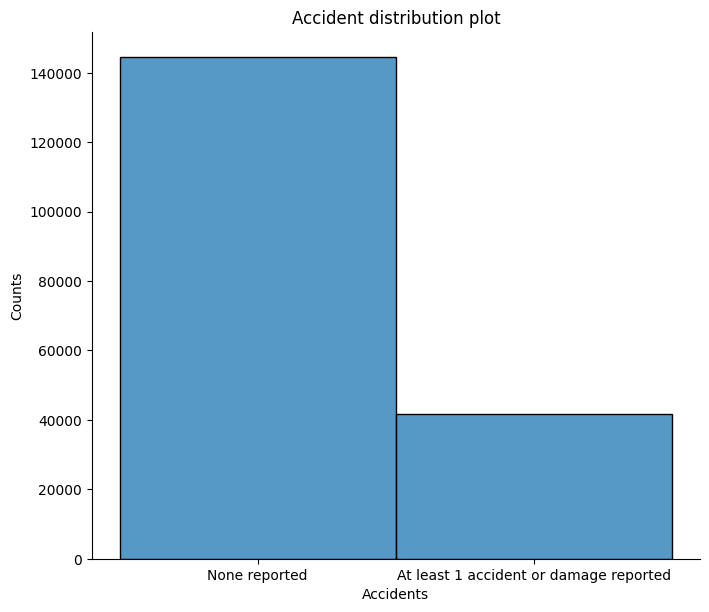

In [12]:
#accidents
plt.figure(figsize=(12, 6)) 
sns.displot(data = df, x = 'accident', height=6, aspect=1.2)
plt.xlabel('Accidents')
plt.ylabel('Counts')
plt.title('Accident distribution plot')
plt.show()

In [13]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [14]:
categorical_features_names = ['brand','model','fuel_type','engine','transmission','ext_col', 'int_col', 'accident','clean_title']

In [15]:
df[categorical_features_names].nunique()

brand             57
model           1897
fuel_type          7
engine          1117
transmission      52
ext_col          319
int_col          156
accident           2
clean_title        1
dtype: int64

In [16]:
df[categorical_features_names] = df[categorical_features_names].fillna('missing')

In [17]:
df = df.drop(['id'],axis = 1)

In [18]:
from catboost import CatBoost, CatBoostRegressor, Pool 
df_ = df.sample(frac=1., random_state=0)
df_train = df_.iloc[: 2 * len(df) // 3]
df_test = df_.iloc[2 * len(df) // 3 :]
train_pool = Pool(df_train.drop(['price'], axis = 1), 
                  label=df_train.price,
                  cat_features=categorical_features_names)
test_pool = Pool(df_test.drop(['price'],axis = 1),
                 label=df_test.price,
                 cat_features=categorical_features_names)

In [19]:
model = CatBoostRegressor(custom_metric= ['R2', 'RMSE'], learning_rate=0.1, n_estimators=500)
model.fit(train_pool, eval_set=test_pool, verbose=2000, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 76909.0383512	test: 80094.7700946	best: 80094.7700946 (0)	total: 228ms	remaining: 1m 53s
499:	learn: 68703.8085623	test: 75480.5478946	best: 75354.4031132 (111)	total: 1m 8s	remaining: 0us

bestTest = 75354.40311
bestIteration = 111

Shrink model to first 112 iterations.


In [20]:
model.get_best_score()

{'learn': {'R2': 0.21935517315130137, 'RMSE': 68703.80856227556},
 'validation': {'R2': 0.1323343923621073, 'RMSE': 75354.40311322194}}

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

test_predictions = model.predict(test_pool)
test_rmse = np.sqrt(mean_squared_error(df_test.price, test_predictions))
test_r2 = r2_score(df_test.price, test_predictions)

print(f'Test RMSE: {test_rmse}')
print(f'Test R2: {test_r2}')

Test RMSE: 75354.40311322192
Test R2: 0.13233439236210887
